In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/jw3514/Work/ASD_Circuits/src')
from ASD_Circuits import *

/home/jw3514/anaconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
W_ipsi = pd.read_excel("../dat/allen-mouse-conn/nature13186-s4.xlsx", sheet_name="W_ipsi")
PValue_ipsi = pd.read_excel("../dat/allen-mouse-conn/nature13186-s4.xlsx", sheet_name="PValue_ipsi")
W_contra = pd.read_excel("../dat/allen-mouse-conn/nature13186-s4.xlsx", sheet_name="W_contra")
PValue_contra = pd.read_excel("../dat/allen-mouse-conn/nature13186-s4.xlsx", sheet_name="PValue_contra")
W_ipsi = W_ipsi.set_index("Unnamed: 0")
PValue_ipsi = PValue_ipsi.set_index("Unnamed: 0")
W_contra = W_contra.set_index("Unnamed: 0")
PValue_contra = PValue_contra.set_index("Unnamed: 0")

/home/jw3514/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/jw3514/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/jw3514/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/jw3514/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:
RawDistance = pd.read_excel("../dat/allen-mouse-conn/41586_2014_BFnature13186_MOESM72_ESM.xlsx", 
                            index_col=0)
# Combined
DistanceMat_ipsi = pd.DataFrame(data=np.zeros((213,213)), index=W_ipsi.index.values,
                             columns=W_ipsi.columns.values)
DistanceMat_contra = pd.DataFrame(data=np.zeros((213,213)), index=W_contra.index.values,
                             columns=W_contra.columns.values)
for str_i in DistanceMat_ipsi.index.values:
    for str_j in DistanceMat_ipsi.columns.values:
        dist = RawDistance.loc["{}_ipsi".format(str_i), "{}_ipsi".format(str_j)]
        DistanceMat_ipsi.loc[str_i, str_j] = dist
        
for str_i in DistanceMat_contra.index.values:
    for str_j in DistanceMat_contra.columns.values:
        dist = RawDistance.loc["{}_ipsi".format(str_i), "{}_contra".format(str_j)]
        DistanceMat_contra.loc[str_i, str_j] = dist

In [4]:
W_ipsi[PValue_ipsi > 0.05] = 0
W_contra[PValue_contra > 0.05] = 0

In [5]:
ontology = pd.read_csv("../dat/Other/ontology.csv")
#onotology = pd.read_csv("dat/voxel.csv")
#ontology["acronym"] = 
acronym2name = {}
for i, row in ontology.iterrows():
    acronym2name[row["acronym"]] = clean_name(row["safe_name"])

W_ipsi.columns = [acronym2name[x] for x in W_ipsi.columns.values]
W_ipsi.index = [acronym2name[x] for x in W_ipsi.index.values]

W_contra.columns = [acronym2name[x] for x in W_contra.columns.values]
W_contra.index = [acronym2name[x] for x in W_contra.index.values]

DistanceMat_ipsi.index = W_ipsi.index.values
DistanceMat_ipsi.columns = W_ipsi.columns.values

DistanceMat_contra.index = W_contra.index.values
DistanceMat_contra.columns = W_contra.columns.values

In [6]:
adj_ipsi_short, adj_ipsi_long = ConnectomeSeperation_Distance(W_ipsi, DistanceMat_ipsi)

2637.3518915760937


In [7]:
InfoMat_Short, InfoMat_Long = ConnectomeSeperation_Distance(
    InfoMat, DistanceMat_ipsi, mid=2637.3518915760937)
InfoMat_Short.to_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/InfoMat.Ipsi.Short.2600.csv")
InfoMat_Long.to_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/InfoMat.Ipsi.Long.2600.csv")

NameError: name 'InfoMat' is not defined

In [ ]:
InfoMat_Short, InfoMat_Long = ConnectomeSeperation_Distance(
    InfoMat, DistanceMat_ipsi, mid=3987.911411350302)
InfoMat_Short.to_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/InfoMat.Ipsi.Short.3900.csv")
InfoMat_Long.to_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/InfoMat.Ipsi.Long.3900.csv")

In [198]:
ConnMat_Short, ConnMat_Long = ConnectomeSeperation_Distance(
    W_ipsi, DistanceMat_ipsi, mid=3987.911411350302)
ConnMat_Short.to_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/WeightMat.Ipsi.Short.3900.csv")
ConnMat_Long.to_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/WeightMat.Ipsi.Long.3900.csv")

3987.911411350302


##### Check contra wo mirror

In [ ]:
_w_contra = W_contra.copy(deep=True)
_w_contra[W_ipsi!=0]=0

In [ ]:
ALL_Distances = DistanceMat_contra.values.flatten()
DistanceDeciles_contra = np.percentile(ALL_Distances, np.arange(0, 100, 10))
DistanceDeciles_contra = np.append(DistanceDeciles_contra, max(ALL_Distances))
Pairs_Dist_contra, bins = np.histogram(ALL_Distances, bins=DistanceDeciles_contra)

distances = DistanceMat_contra[(_w_contra>0)]
distances = distances[~np.isnan(distances)]
distances = np.nan_to_num(distances, nan=0).flatten()
distances = [x for x in distances if x >0]

Distances_w_edges = distances
Edges_Dist_contra, bins = np.histogram(Distances_w_edges, bins=DistanceDeciles_contra)

In [ ]:
Counts_all, bins = np.histogram(ALL_Distances, bins=DistanceDeciles_contra)
Counts_conn, bins = np.histogram(distances, bins=DistanceDeciles_contra)
r = range(len(bins)-1)
names = ["%.0f-%.0f"%(bins[i], bins[i+1]) for i in range(len(bins)-1)]
plt.figure(dpi=120)
barWidth = 0.85
#plt.bar(r, Counts_all, color='#b5ffb9', edgecolor='white', width=barWidth, label="group A")
plt.bar(r, Counts_conn, color='#f9bc86', edgecolor='white', width=barWidth, label="group B")
plt.xticks(r, names)
plt.xlabel("group")
plt.xticks(rotation = 45) 
plt.title("contra wo mirror")
plt.show()

In [ ]:
_w_contra2 = W_contra.copy(deep=True)
_w_contra2[W_ipsi==0]=0

In [ ]:
ALL_Distances = DistanceMat_contra.values.flatten()
DistanceDeciles_contra = np.percentile(ALL_Distances, np.arange(0, 100, 10))
DistanceDeciles_contra = np.append(DistanceDeciles_contra, max(ALL_Distances))
Pairs_Dist_contra, bins = np.histogram(ALL_Distances, bins=DistanceDeciles_contra)

distances = DistanceMat_contra[(_w_contra2>0)]
distances = distances[~np.isnan(distances)]
distances = np.nan_to_num(distances, nan=0).flatten()
distances = [x for x in distances if x >0]

Distances_w_edges = distances
Edges_Dist_contra, bins = np.histogram(Distances_w_edges, bins=DistanceDeciles_contra)

In [ ]:
Counts_all, bins = np.histogram(ALL_Distances, bins=DistanceDeciles_contra)
Counts_conn, bins = np.histogram(distances, bins=DistanceDeciles_contra)
r = range(len(bins)-1)
names = ["%.0f-%.0f"%(bins[i], bins[i+1]) for i in range(len(bins)-1)]
plt.figure(dpi=120)
barWidth = 0.85
#plt.bar(r, Counts_all, color='#b5ffb9', edgecolor='white', width=barWidth, label="group A")
plt.bar(r, Counts_conn, color='#f9bc86', edgecolor='white', width=barWidth, label="group B")
plt.xticks(r, names)
plt.xlabel("group")
plt.xticks(rotation = 45) 
plt.title("contra w mirror")
plt.show()

##### test connection weights of contra/ipsi

In [ ]:
#_w_contra
ALL_W_Ipsi, ALL_W_Contra = [],[]
for str_i in W_contra.index.values:
    tmp_ipsi = []
    tmp_contra = []
    for str_j in W_contra.index.values:
        w_i = W_ipsi.loc[str_i, str_j]
        w_c = W_contra.loc[str_i, str_j]
        if w_i > 0:
            tmp_ipsi.append(w_i)
        if w_c > 0:
            tmp_contra.append(w_c)
    if len(tmp_ipsi) > 0:
        mean_ipsi = np.mean(tmp_ipsi)
    else:
        mean_ipsi = 0
    if len(tmp_contra) > 0:
        mean_contra = np.mean(tmp_contra)
    else:
        mean_contra = 0
    #print(str_i, mean_ipsi, mean_contra)
    ALL_W_Ipsi.append(mean_ipsi)
    ALL_W_Contra.append(mean_contra)
ALL_W_Ipsi = np.array(ALL_W_Ipsi)
ALL_W_Contra = np.array(ALL_W_Contra)

In [ ]:
print(np.sum([ALL_W_Ipsi>ALL_W_Contra]))
print(np.sum([ALL_W_Ipsi<ALL_W_Contra]))
print(np.sum([ALL_W_Ipsi==ALL_W_Contra]))

In [ ]:
folds = ALL_W_Ipsi / ALL_W_Contra
folds = [x for x in folds if (x < 100) and (x>0)]
print(np.mean(folds))
plt.hist(folds)

In [ ]:
wilcoxon(ALL_W_Ipsi, ALL_W_Contra)

In [ ]:
#_w_contra
ALL_W_c_w_i, ALL_W_c_wo_i = [],[]
for str_i in W_contra.index.values:
    tmp_c_w_i = []
    tmp_c_wo_i = []
    for str_j in W_contra.index.values:
        w_i = _w_contra2.loc[str_i, str_j]
        w_c = _w_contra.loc[str_i, str_j]
        if w_i > 0:
            tmp_c_w_i.append(w_i)
        if w_c > 0:
            tmp_c_wo_i.append(w_c)
    if len(tmp_c_w_i) > 0:
        mean_c_w_i = np.mean(tmp_c_w_i)
    else:
        mean_c_w_i = 0
    if len(tmp_c_wo_i) > 0:
        mean_c_wo_i = np.mean(tmp_c_wo_i)
    else:
        mean_c_wo_i = 0
    #print(str_i, mean_ipsi, mean_contra)
    ALL_W_c_w_i.append(mean_c_w_i)
    ALL_W_c_wo_i.append(mean_c_wo_i)
ALL_W_c_w_i = np.array(ALL_W_c_w_i)
ALL_W_c_wo_i = np.array(ALL_W_c_wo_i)

In [ ]:
print(np.sum([ALL_W_c_w_i>ALL_W_c_wo_i]))
print(np.sum([ALL_W_c_w_i<ALL_W_c_wo_i]))

In [ ]:
wilcoxon(ALL_W_c_w_i, ALL_W_c_wo_i)

In [ ]:
folds = ALL_W_c_w_i / ALL_W_c_wo_i
folds = [x for x in folds if (x < 100) and (x>0)]
print(np.mean(folds))
plt.hist(folds)

##### drop contra-wo- mirror

In [ ]:
### drop contra-wo-mirror edges
W_contra[W_ipsi==0]=0

In [ ]:
# ipsi 
ALL_Distances = DistanceMat_ipsi.values.flatten()
DistanceDeciles_ipsi = np.percentile(ALL_Distances, np.arange(0, 100, 10))
DistanceDeciles_ipsi = np.append(DistanceDeciles_ipsi, max(ALL_Distances))
Pairs_Dist_ipsi, bins = np.histogram(ALL_Distances, bins=DistanceDeciles_ipsi)

distances = DistanceMat_ipsi[(W_ipsi>0)]
distances = distances[~np.isnan(distances)]
distances = np.nan_to_num(distances, nan=0).flatten()
distances = [x for x in distances if x >0]

Distances_w_edges = distances
Edges_Dist_ipsi, bins = np.histogram(Distances_w_edges, bins=DistanceDeciles_ipsi)

In [ ]:
# contra
ALL_Distances = DistanceMat_contra.values.flatten()
DistanceDeciles_contra = np.percentile(ALL_Distances, np.arange(0, 100, 10))
DistanceDeciles_contra = np.append(DistanceDeciles_contra, max(ALL_Distances))
Pairs_Dist_contra, bins = np.histogram(ALL_Distances, bins=DistanceDeciles_contra)

distances = DistanceMat_contra[(W_contra>0)]
distances = distances[~np.isnan(distances)]
distances = np.nan_to_num(distances, nan=0).flatten()
distances = [x for x in distances if x >0]

Distances_w_edges = distances
Edges_Dist_contra, bins = np.histogram(Distances_w_edges, bins=DistanceDeciles_contra)

In [ ]:
P_ipsi = Edges_Dist_ipsi/Pairs_Dist_ipsi
I_ipsi = -np.log2(P_ipsi)
I_ipsi_ = -np.log2(1-P_ipsi)

P_contra = Edges_Dist_contra/Pairs_Dist_contra
I_contra = -np.log2(P_contra)
I_contra_ = -np.log2(1-P_contra)

In [ ]:
str2reg = STR2Region()
def AssignInfo(dist, bins, info):
    for i in range(len(bins)-1):
        if dist >= bins[i] and dist < bins[i+1]:
            return info[i]
    return info[-1]
    #print(dist)
    #print(bins)
    
def MakeInfoMat_Distance_Cortical_NonCortical_Ipsi_Contra(Bins, W_Infos, N_Infos, adjMat_ipsi, 
                    adjMat_contra, distMat_ipsi, distMat_contra, str2reg):
    DistanceBin_ipsi, DistanceBin_contra = Bins
    I_ipsi, I_contra, = W_Infos
    I_ipsi_, I_contra_ = N_Infos
    OutMat = pd.DataFrame(data=np.zeros((adjMat_ipsi.shape[0], adjMat_ipsi.shape[1])), 
                          index=adjMat_ipsi.index.values, columns=adjMat_ipsi.columns.values)
    for node_i in adjMat_ipsi.index.values:
        for node_j in adjMat_ipsi.columns.values:
            w_ipsi = adjMat_ipsi.loc[node_i, node_j]
            w_contra = adjMat_contra.loc[node_i, node_j]
            d_ipsi = distMat_ipsi.loc[node_i, node_j]
            d_contra = distMat_contra.loc[node_i, node_j]
            if node_i == node_j:
                OutMat.loc[node_i, node_j] = 0
            else:
                if w_ipsi > 0 and w_contra == 0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi)
                    OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_)
                if w_ipsi == 0 and w_contra > 0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi_) 
                    OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra) 
                if w_ipsi > 0 and w_contra > 0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi) 
                    OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra) 
                if w_ipsi ==0 and w_contra ==0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi_) 
                    OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_) 
    return OutMat

Bins = [DistanceDeciles_ipsi, DistanceDeciles_contra]
W_Infos = [I_ipsi, I_contra]
N_Infos = [I_ipsi_, I_contra_]
InfoMat = MakeInfoMat_Distance_Cortical_NonCortical_Ipsi_Contra(
    Bins, W_Infos, N_Infos, W_ipsi, W_contra, DistanceMat_ipsi, DistanceMat_contra, str2reg)
InfoMat.to_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/InfoMat.Ipsi.contra_w_mirror.csv")

In [ ]:
# Ipsi Only
def MakeInfoMat_Distance_Cortical_NonCortical_Ipsi(Bins, W_Infos, N_Infos, adjMat_ipsi, 
                    adjMat_contra, distMat_ipsi, distMat_contra, str2reg):
    DistanceBin_ipsi, DistanceBin_contra = Bins
    I_ipsi, I_contra, = W_Infos
    I_ipsi_, I_contra_ = N_Infos
    OutMat = pd.DataFrame(data=np.zeros((adjMat_ipsi.shape[0], adjMat_ipsi.shape[1])), 
                          index=adjMat_ipsi.index.values, columns=adjMat_ipsi.columns.values)
    for node_i in adjMat_ipsi.index.values:
        for node_j in adjMat_ipsi.columns.values:
            w_ipsi = adjMat_ipsi.loc[node_i, node_j]
            w_contra = adjMat_contra.loc[node_i, node_j]
            d_ipsi = distMat_ipsi.loc[node_i, node_j]
            d_contra = distMat_contra.loc[node_i, node_j]
            if node_i == node_j:
                OutMat.loc[node_i, node_j] = 0
            else:
                if w_ipsi > 0 and w_contra == 0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi)
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_)
                if w_ipsi == 0 and w_contra > 0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi_) 
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra) 
                if w_ipsi > 0 and w_contra > 0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi) 
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra) 
                if w_ipsi ==0 and w_contra ==0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi_) 
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_) 
    return OutMat

Bins = [DistanceDeciles_ipsi, DistanceDeciles_contra]
W_Infos = [I_ipsi, I_contra]
N_Infos = [I_ipsi_, I_contra_]
InfoMat = MakeInfoMat_Distance_Cortical_NonCortical_Ipsi(
    Bins, W_Infos, N_Infos, W_ipsi, W_contra, DistanceMat_ipsi, DistanceMat_contra, str2reg)
InfoMat.to_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/InfoMat.Ipsi.csv")

In [ ]:
Ncont = 100
contDir = "../dat/Unionize_bias/SubSampleSib/"
topNs = list(range(200, 5, -5))

def SI_Rank_profile_Case(ASD_BiasDF, InfoMat, topNs):
    asd_scores = []
    for topN in topNs:
        top_strs = ASD_BiasDF.index.values[:topN]
        score = ScoreCircuit_SI_Joint(top_strs, InfoMat)
        asd_scores.append(score)
    asd_scores = np.array(asd_scores)
    return asd_scores

def SI_Rank_Profile_Ctrl(contDir, InfoMat, topNs, Ncont=100):
    ASD_Cont_SI_SCores_All = []
    for i, file in enumerate(os.listdir(contDir)):
        if file.startswith("cont.genes"):
            continue
        df = pd.read_csv(contDir + file, index_col="STR")
        cont_scores = []
        for topN in topNs:
            top_strs = df.index.values[:topN]
            score = ScoreCircuit_SI_Joint(top_strs, InfoMat)
            cont_scores.append(score)
        cont_scores = np.array(cont_scores)
        ASD_Cont_SI_SCores_All.append(cont_scores)
        if i >= Ncont -1:
            break
    ASD_Cont_SI_SCores_All = np.array(ASD_Cont_SI_SCores_All)
    return ASD_Cont_SI_SCores_All

In [ ]:
ASD_BiasDF = pd.read_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.csv", index_col="STR")
Ncont = 100
contDir = "../dat/Unionize_bias/SubSampleSib/"
topNs = list(range(200, 5, -5))

In [ ]:
asd_score = ScoreCircuit_SI_Joint(ASD_BiasDF.head(46).index.values, InfoMat)
asd_score

In [ ]:
ipsi_case_profile = SI_Rank_profile_Case(ASD_BiasDF, InfoMat, topNs)
ipsi_ctrl_profile = SI_Rank_Profile_Ctrl(contDir, InfoMat, topNs)

In [ ]:
plt.plot(topNs, ipsi_case_profile)
plt.plot(topNs, ipsi_ctrl_profile.mean(axis=0))

In [ ]:
fig, ax = plt.subplots(dpi=480, figsize=(8,3))
cont_xx = ipsi_case_profile - ipsi_ctrl_profile
cont = np.nanmean(ipsi_ctrl_profile, axis=0)
mean = cont_xx.mean(axis=0)
lower = np.percentile(cont_xx, 50-34.1, axis=0)
upper = np.percentile(cont_xx, 50+34.1, axis=0)
ax.errorbar(topNs, mean, color="grey", marker="o", markersize=1.5, lw=0.5,
            yerr=(mean - lower, upper - mean ), ls="dashed", label="Info-Diff")

ax.grid(True)
ax.set_xlabel("Structure Rank")
ax.set_ylabel("Circuit Score")
plt.legend()

In [ ]:
topN = 46

Ncont = 10000
contDir = "../dat/Unionize_bias/SubSampleSib/"
#InfoMat = pd.read_csv()

def TestPAtSize(ASD_BiasDF, contDir, topN, InfoMat):
    topN_bias = []
    cont_topN_Scores = []

    for i, file in enumerate(os.listdir(contDir)):
        if not file.startswith("cont.bias."):
            continue
        df = pd.read_csv(contDir + file, index_col="STR")
        top_strs = df.index.values[:topN]
        cont_score = ScoreCircuit_SI_Joint(top_strs, InfoMat)
        cont_topN_Scores.append(cont_score)
        if i > Ncont:
            break
    asd_score = ScoreCircuit_SI_Joint(ASD_BiasDF.head(topN).index.values, InfoMat)
    return asd_score, cont_topN_Scores

In [ ]:
topN = 46
asd_score, cont_topN_Scores = TestPAtSize(
    ASD_BiasDF, contDir, topN, InfoMat)
fig, axs = plt.subplots(1,1, dpi=120, figsize=(3,3))
PlotPermutationP(cont_topN_Scores, asd_score, axs,
                     title="ipsi+contra".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

In [ ]:
topN = 46
asd_score, cont_topN_Scores = TestPAtSize(
    ASD_BiasDF, contDir, topN, InfoMat_Long)
fig, axs = plt.subplots(1,1, dpi=120, figsize=(3,3))
PlotPermutationP(cont_topN_Scores, asd_score, axs,
                     title="ipsi+contra".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

In [ ]:
topN = 46
asd_score, cont_topN_Scores = TestPAtSize(
    ASD_BiasDF, contDir, topN, InfoMat_Long)
fig, axs = plt.subplots(1,1, dpi=120, figsize=(3,3))
PlotPermutationP(cont_topN_Scores, asd_score, axs,
                     title="ipsi+contra".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

In [ ]:
topN = 46
asd_score, cont_topN_Scores = TestPAtSize(
    ASD_BiasDF, contDir, topN, InfoMat_JC)
fig, axs = plt.subplots(1,1, dpi=120, figsize=(3,3))
PlotPermutationP(cont_topN_Scores, asd_score, axs,
                     title="ipsi+contra".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

In [ ]:
InfoMat_Long

In [ ]:
InfoMat

### Use connectivity Measure

In [ ]:
ConnMat_Ipsi = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/WeightMat.Ipsi.csv", index_col=0)

In [ ]:
topN = 46

Ncont = 10000
contDir = "../dat/Unionize_bias/SubSampleSib/"

def TestPAtSize(ASD_BiasDF, contDir, topN, InfoMat):
    topN_bias = []
    cont_topN_Scores = []

    for i, file in enumerate(os.listdir(contDir)):
        if not file.startswith("cont.bias."):
            continue
        df = pd.read_csv(contDir + file, index_col="STR")
        top_strs = df.index.values[:topN]
        cont_score = ScoreCircuit_NEdges(top_strs, InfoMat)
        cont_topN_Scores.append(cont_score)
        if i > Ncont:
            break
    asd_score = ScoreCircuit_NEdges(ASD_BiasDF.head(topN).index.values, InfoMat)
    return asd_score, cont_topN_Scores

topN = 46
asd_score, cont_topN_Scores = TestPAtSize(
    ASD_BiasDF, contDir, topN, ConnMat_Ipsi)
fig, axs = plt.subplots(1,1, dpi=120, figsize=(3,3))
PlotPermutationP(cont_topN_Scores, asd_score, axs,
                     title="ipsi+contra".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

In [ ]:
topN = 46

Ncont = 10000
contDir = "../dat/Unionize_bias/SubSampleSib/"

def TestPAtSize(ASD_BiasDF, contDir, topN, InfoMat):
    topN_bias = []
    cont_topN_Scores = []

    for i, file in enumerate(os.listdir(contDir)):
        if not file.startswith("cont.bias."):
            continue
        df = pd.read_csv(contDir + file, index_col="STR")
        top_strs = df.index.values[:topN]
        cont_score = ScoreCircuit_NEdges_ALL(top_strs, InfoMat)
        cont_topN_Scores.append(cont_score)
        if i > Ncont:
            break
    asd_score = ScoreCircuit_NEdges_ALL(ASD_BiasDF.head(topN).index.values, InfoMat)
    return asd_score, cont_topN_Scores

topN = 46
asd_score, cont_topN_Scores = TestPAtSize(
    ASD_BiasDF, contDir, topN, ConnMat_Ipsi)
fig, axs = plt.subplots(1,1, dpi=120, figsize=(3,3))
PlotPermutationP(cont_topN_Scores, asd_score, axs,
                     title="ipsi+contra".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

### Use cohesiveness Measure

In [ ]:
g = LoadConnectome2(ConnMat_Ipsi)

topN = 50

Ncont = 10000
contDir = "../dat/Unionize_bias/SubSampleSib/"

def TestPAtSize(ASD_BiasDF, contDir, topN, g):
    topN_bias = []
    cont_topN_Scores = []

    for i, file in enumerate(os.listdir(contDir)):
        if not file.startswith("cont.bias."):
            continue
        df = pd.read_csv(contDir + file, index_col="STR")
        top_strs = df.index.values[:topN]
        cont_score, cont_conn = ScoreSTRSet(g, df.head(topN).index.values, {})
        cont_topN_Scores.append(cont_score)
        if i > Ncont:
            break
    #asd_score = ScoreCircuit_NEdges(ASD_BiasDF.head(topN).index.values, InfoMat)
    asd_score, asd_conn = ScoreSTRSet(g, ASD_BiasDF.head(topN).index.values, {})
    return asd_score, cont_topN_Scores

topN = 46
asd_score, cont_topN_Scores = TestPAtSize(
    ASD_BiasDF, contDir, topN, g)
fig, axs = plt.subplots(1,1, dpi=120, figsize=(3,3))
PlotPermutationP(cont_topN_Scores, asd_score, axs,
                     title="ipsi".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")



### Ipsi Seperate Long/Short

In [ ]:
OutDIR = "/home/jw3514/Work/ASD_Circuits/dat/allen-mouse-conn/ScoreingMat_jw_v3/"
adj_short, adj_long = ConnectomeSeperation_Distance(InfoMat, DistanceMat_ipsi)
adj_short.to_csv(OutDIR + "InfoMat.Ipsi.short.csv")
adj_long.to_csv(OutDIR + "InfoMat.Ipsi.long.csv")

In [ ]:
InfoMat = pd.read_csv("")

In [32]:
topNs = np.arange(200, 5, -1)
DIR = "/home/jw3514/Work/ASD_Circuits/scripts"
ASD_Distance = np.load("{}/RankScore.Ipsi.ASD.npy".format(DIR))
Cont_Distance = np.load("{}/RankScore.Ipsi.Cont.npy".format(DIR))

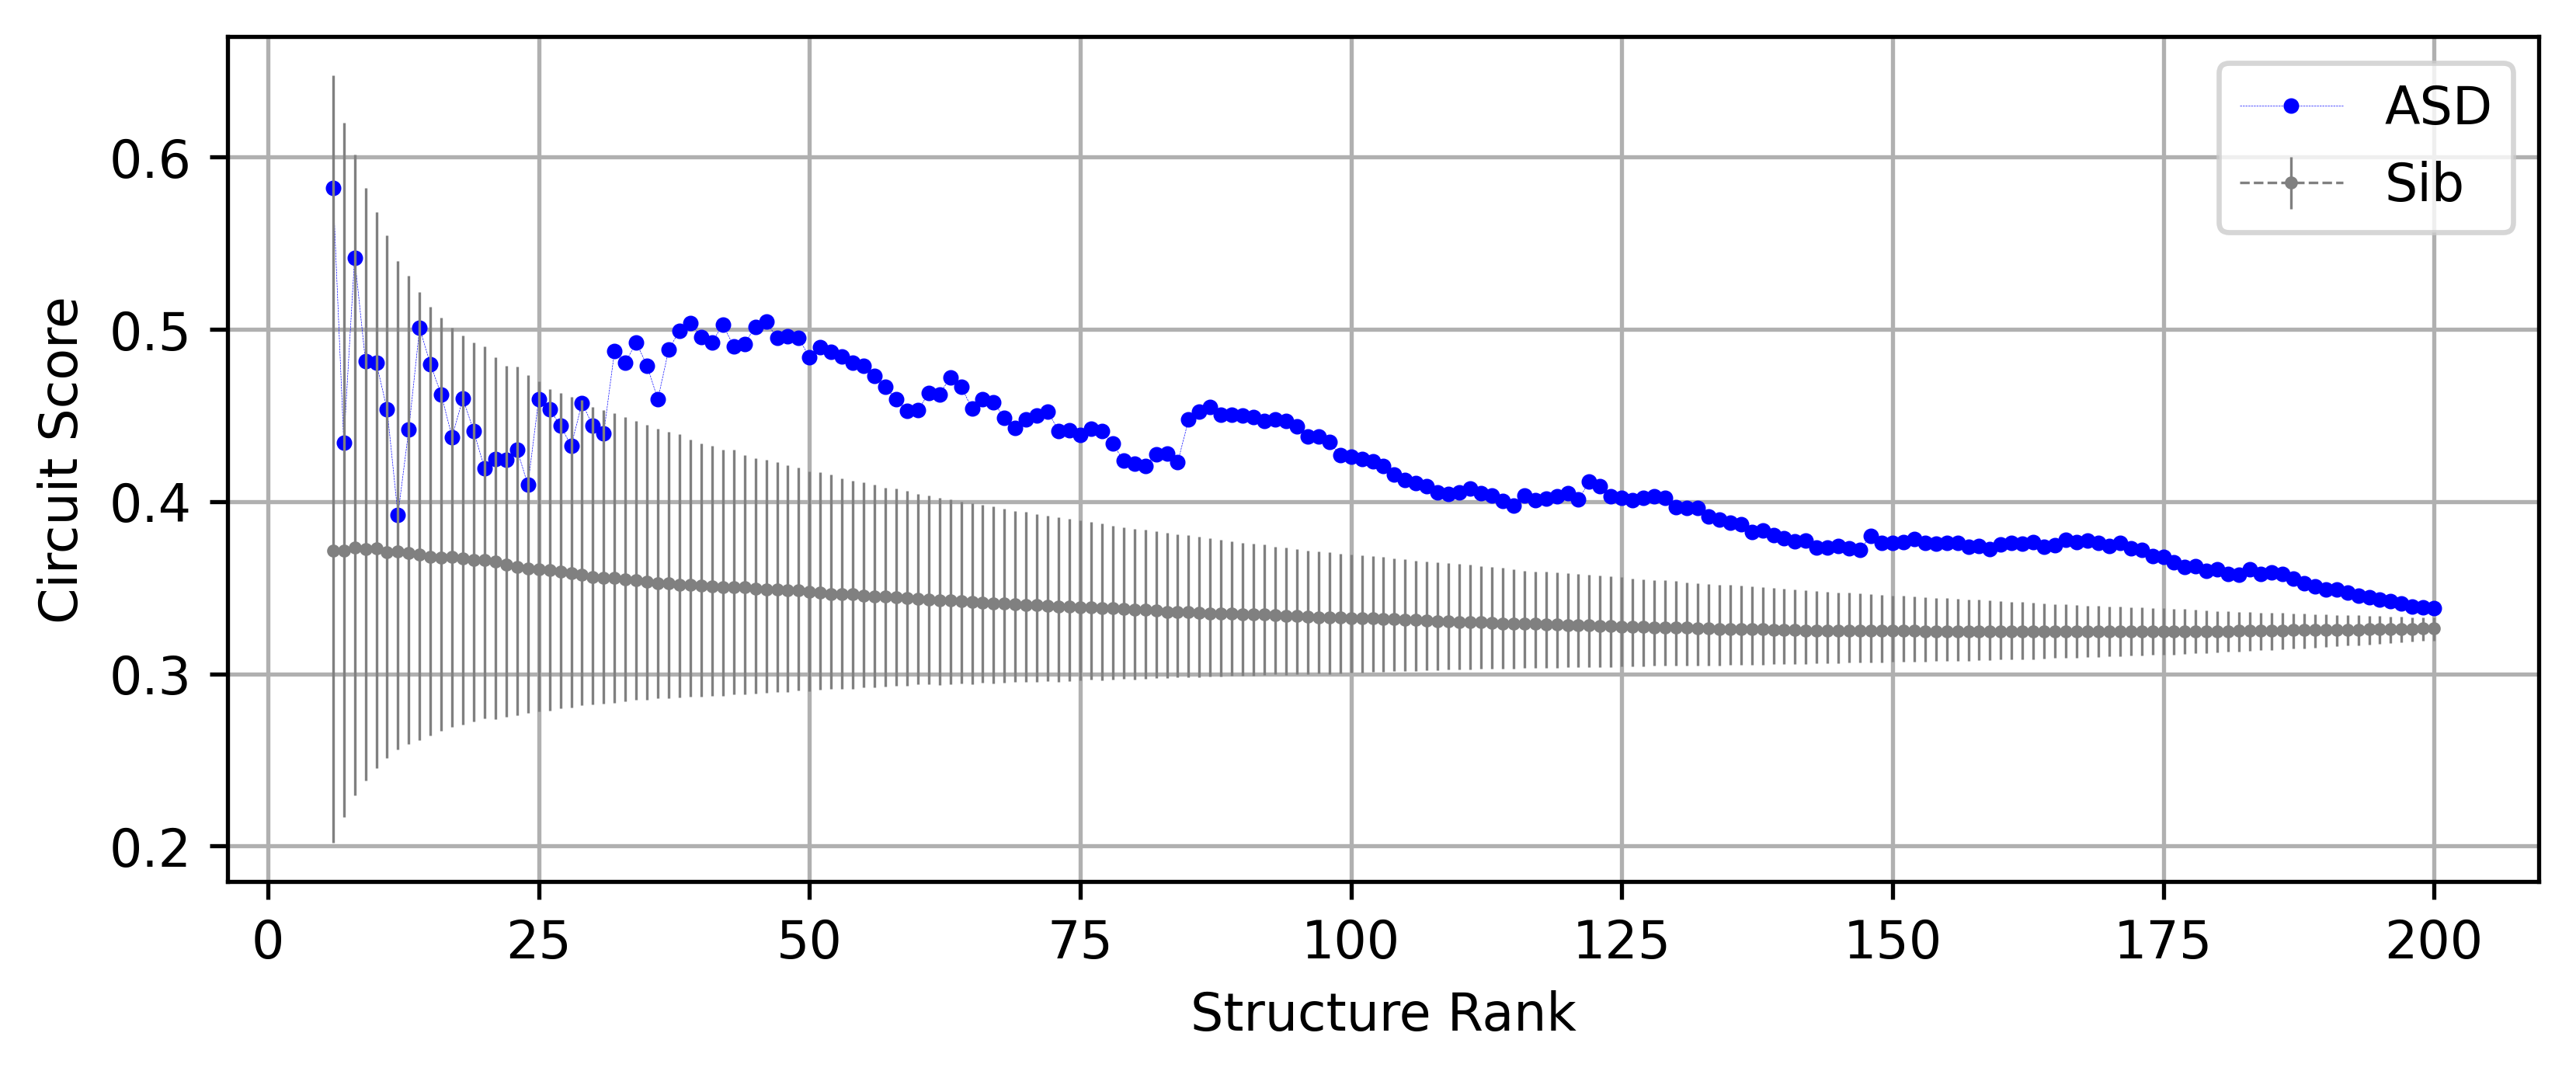

In [11]:
import matplotlib.backends.backend_pdf

fig, ax = plt.subplots(dpi=480, figsize=(8,3))

cont = np.median(Cont_Distance, axis=0)
ax.plot(topNs, ASD_Distance, color="blue", marker="o", markersize=2, lw=0.1,
                     ls="dashed", label="ASD")

lower = np.percentile(Cont_Distance, 50-34.1, axis=0)
upper = np.percentile(Cont_Distance, 50+34.1, axis=0)
ax.errorbar(topNs, cont, color="grey", marker="o", markersize=1.5, lw=0.5,
            yerr=(cont - lower, upper - cont ), ls="dashed", label="Sib")

ax.grid(True)
ax.set_xlabel("Structure Rank")
ax.set_ylabel("Circuit Score")
plt.legend()

In [12]:
# Get P 
def get_peak_n_P(topNs, dat, Cont, Nexclude=10):
    peak_idx = np.argmax(dat[:-Nexclude])
    peak_size = topNs[peak_idx]
    peak_value = dat[peak_idx]
    Z, P = GetPermutationP(Cont[:, peak_idx], peak_value)
    return peak_value, peak_size, -np.log10(P)
ASD_Peak_Value, ASD_Peak_Size, ASD_Peak_Q = get_peak_n_P(topNs, ASD_Distance, Cont_Distance)
print(ASD_Peak_Size)

Cont_Peak_Values = []
Cont_Peak_Sizes = []
Cont_Peak_Q = []
Sib_Sizes = []
for cont_dat in Cont_Distance:
    ctrl_Peak_Value, ctrl_Peak_Size, ctrl_Peak_Q = get_peak_n_P(topNs, cont_dat, Cont_Distance)
    if ctrl_Peak_Q > 2:
        Sib_Sizes.append(ctrl_Peak_Size)
    Cont_Peak_Values.append(ctrl_Peak_Value)
    Cont_Peak_Sizes.append(ctrl_Peak_Size)
    Cont_Peak_Q.append(ctrl_Peak_Q)

46


(array([213.,  27.,   9.,  10.,   3.,   3.,   2.,   0.,   1.,   2.]),
 array([ 16. ,  34.3,  52.6,  70.9,  89.2, 107.5, 125.8, 144.1, 162.4,
        180.7, 199. ]),
 <BarContainer object of 10 artists>)

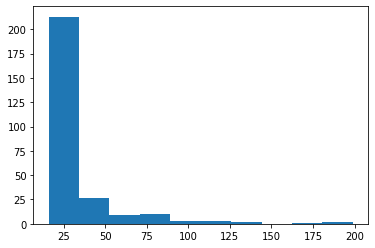

In [13]:
plt.hist(Sib_Sizes)

In [14]:
200/10000

0.02

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '')

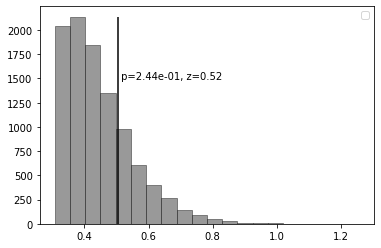

In [15]:
fig, ax = plt.subplots()
PlotPermutationP(Cont_Peak_Values, ASD_Peak_Value, ax)
plt.title("")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: >

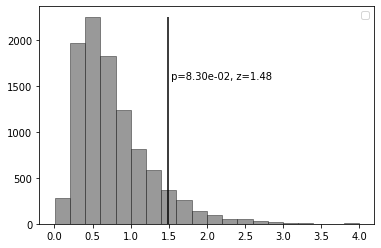

In [16]:
fig, ax = plt.subplots()
PlotPermutationP(Cont_Peak_Q, ASD_Peak_Q, ax)

(array([6453., 1116.,  562.,  322.,  215.,  190.,  148.,  160.,  178.,
         656.]),
 array([ 16. ,  34.4,  52.8,  71.2,  89.6, 108. , 126.4, 144.8, 163.2,
        181.6, 200. ]),
 <BarContainer object of 10 artists>)

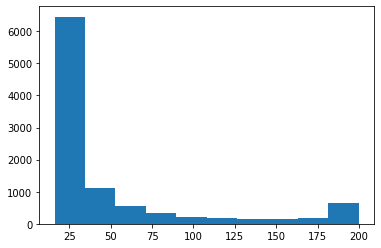

In [17]:
plt.hist(Cont_Peak_Sizes)

In [18]:
ASD_Distance[topNs==186]

array([0.35794437])

In [19]:
DIR = "/home/jw3514/Work/ASD_Circuits/scripts"
ASD_DistanceShort = np.load("{}/RankScore.Ipsi.Short.ASD.npy".format(DIR))
Cont_DistanceShort = np.load("{}/RankScore.Ipsi.Short.Cont.npy".format(DIR))

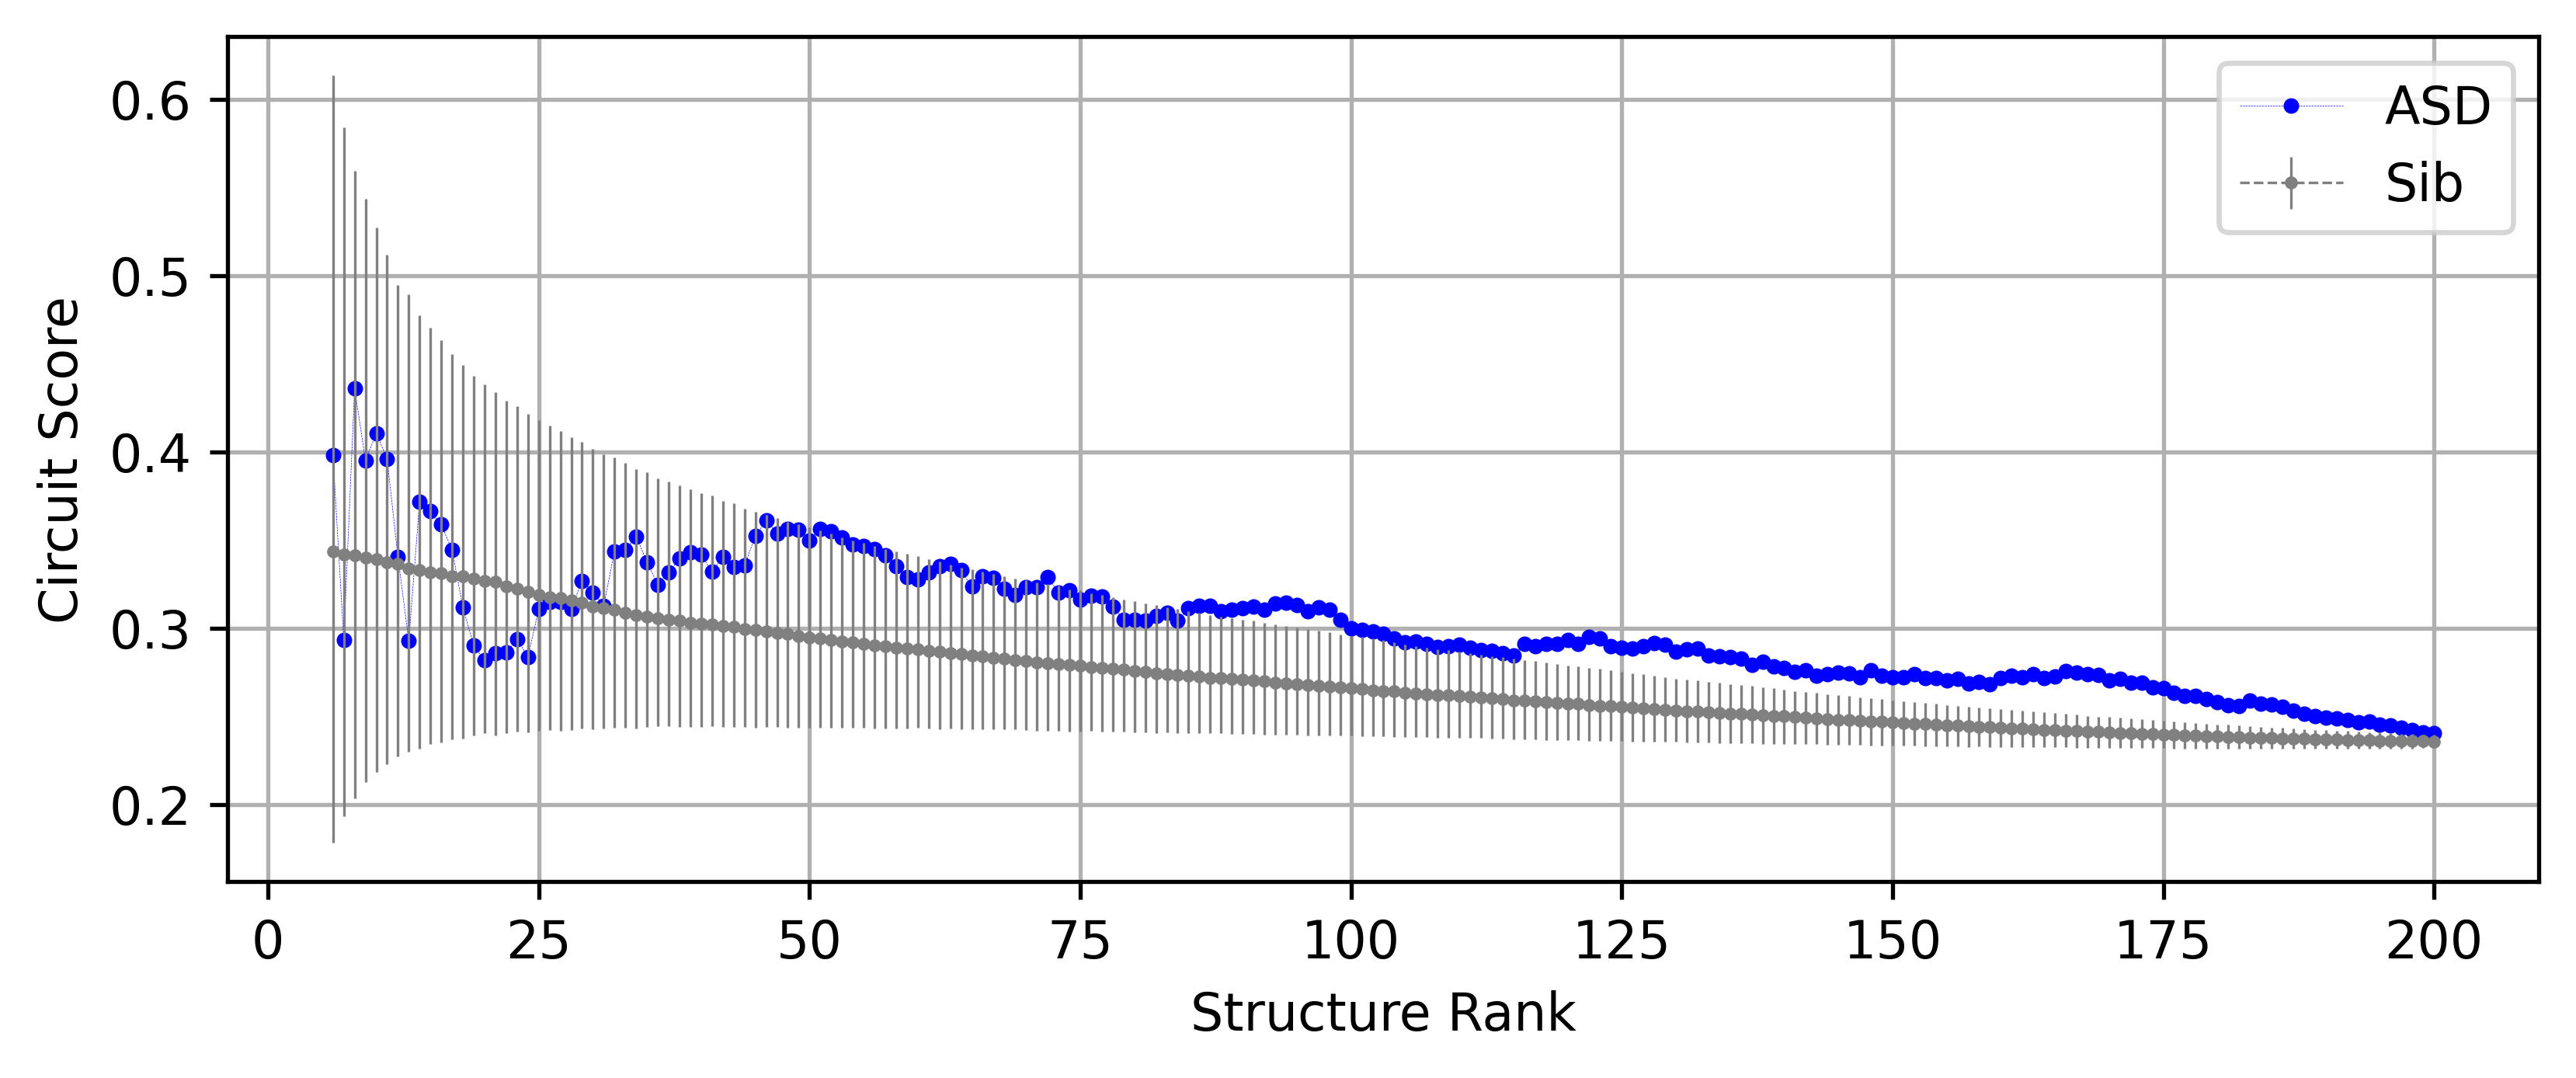

In [20]:
import matplotlib.backends.backend_pdf

fig, ax = plt.subplots(dpi=480, figsize=(8,3))

cont = np.median(Cont_DistanceShort, axis=0)
ax.plot(topNs, ASD_DistanceShort, color="blue", marker="o", markersize=2, lw=0.1,
                     ls="dashed", label="ASD")

lower = np.percentile(Cont_DistanceShort, 50-34.1, axis=0)
upper = np.percentile(Cont_DistanceShort, 50+34.1, axis=0)
ax.errorbar(topNs, cont, color="grey", marker="o", markersize=1.5, lw=0.5,
            yerr=(cont - lower, upper - cont ), ls="dashed", label="Sib")

ax.grid(True)
ax.set_xlabel("Structure Rank")
ax.set_ylabel("Circuit Score")
plt.legend()

In [93]:
DIR = "/home/jw3514/Work/ASD_Circuits/scripts"
ASD_DistanceLong = np.load("{}/RankScore.Ipsi.Long.3900.ASD.npy".format(DIR))
Cont_DistanceLong = np.load("{}/RankScore.Ipsi.Long.3900.Cont.npy".format(DIR))

In [22]:
DIR = "/home/jw3514/Work/ASD_Circuits/scripts"
ASD_DistanceLong = np.load("{}/RankScore.Ipsi.Long.2600.ASD.npy".format(DIR))
Cont_DistanceLong = np.load("{}/RankScore.Ipsi.Long.2600.Cont.npy".format(DIR))

In [26]:
#cont - lower

In [27]:
#upper - cont

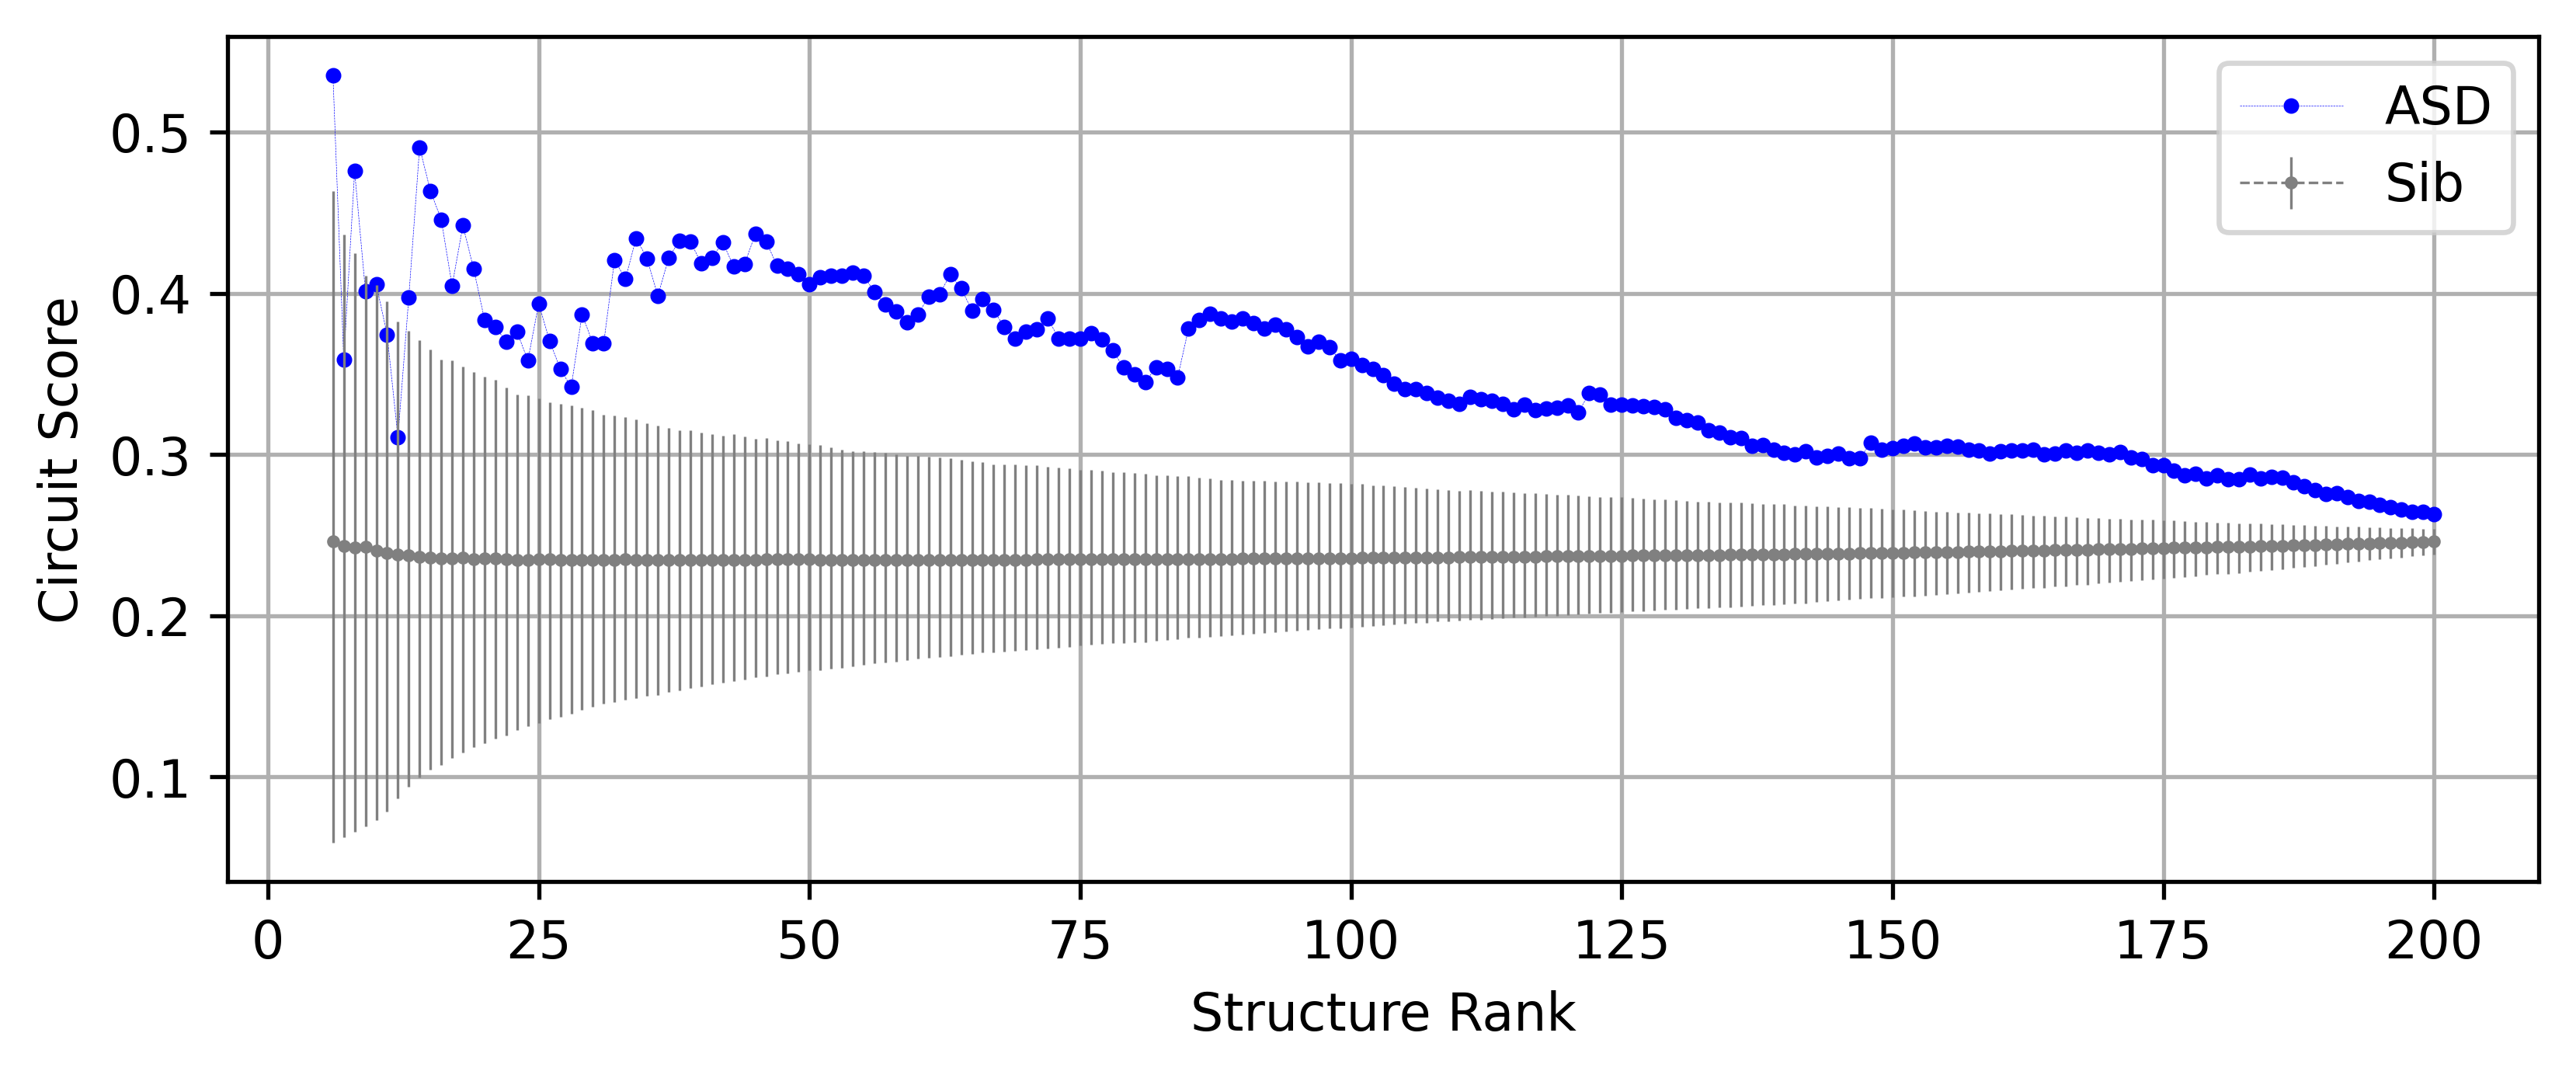

In [28]:
import matplotlib.backends.backend_pdf

fig, ax = plt.subplots(dpi=480, figsize=(8,3))

cont = np.nanmean(Cont_DistanceLong, axis=0)
ax.plot(topNs, ASD_DistanceLong, color="blue", marker="o", markersize=2, lw=0.1,
                     ls="dashed", label="ASD")

lower = np.nanpercentile(Cont_DistanceLong, 50-34.1, axis=0)
upper = np.nanpercentile(Cont_DistanceLong, 50+34.1, axis=0)
ax.errorbar(topNs, cont, color="grey", marker="o", markersize=1.5, lw=0.5,
            yerr=(cont - lower, abs(upper - cont) ), ls="dashed", label="Sib")

ax.grid(True)
ax.set_xlabel("Structure Rank")
ax.set_ylabel("Circuit Score")
plt.legend()

In [ ]:
fig, ax = plt.subplots()
idx = np.where(topNs==46)[0][0]
PlotPermutationP(Cont_DistanceLong[:,idx], ASD_DistanceLong[idx], ax)
Z, P = GetPermutationP(Cont_DistanceLong[:,idx], ASD_DistanceLong[idx])
print(Z, P)

In [382]:
ASD_Peak_Value, ASD_Peak_Size, ASD_Peak_Z = get_peak_n_P(topNs, ASD_DistanceLong, Cont_DistanceLong)

Cont_Peak_Values = []
Cont_Peak_Sizes = []
Cont_Peak_Z = []
for cont_dat in Cont_DistanceLong:
    ctrl_Peak_Value, ctrl_Peak_Size, ctrl_Peak_Z = get_peak_n_P(topNs, cont_dat, Cont_DistanceLong)
    #if ctrl_Peak_Z > 2:
    #    print(ctrl_Peak_Value, ctrl_Peak_Size, ctrl_Peak_Z)
    Cont_Peak_Values.append(ctrl_Peak_Value)
    Cont_Peak_Sizes.append(ctrl_Peak_Size)
    Cont_Peak_Z.append(ctrl_Peak_Z)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: >

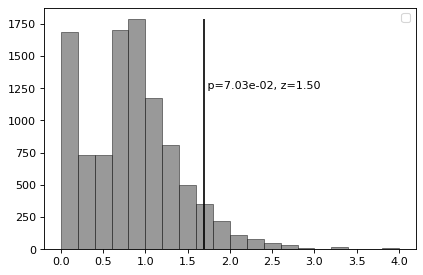

In [383]:
fig, ax = plt.subplots()
PlotPermutationP(Cont_Peak_Z, -np.log10(P), ax)

(array([4019.,  792.,  399.,  293.,  218.,  234.,  249.,  334.,  560.,
        2902.]),
 array([ 11. ,  29.9,  48.8,  67.7,  86.6, 105.5, 124.4, 143.3, 162.2,
        181.1, 200. ]),
 <BarContainer object of 10 artists>)

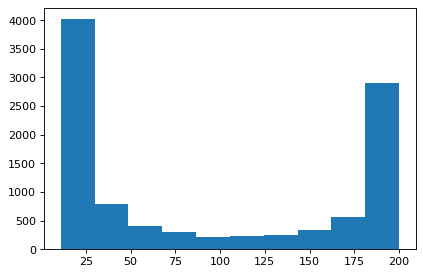

In [384]:
plt.hist(Cont_Peak_Sizes)

In [381]:
def get_peak_n_P(topNs, dat, Cont, Nexclude=5):
    peak_idx = np.argmax(dat[:-Nexclude])
    #peak_idx = np.argmax(dat)
    peak_size = topNs[peak_idx]
    peak_value = dat[peak_idx]
    Z, P = GetPermutationP(Cont[:, peak_idx], peak_value)
    return peak_value, peak_size, -np.log10(P)
    #return peak_value, peak_size, Z
#ASD_Peak_Value, ASD_Peak_Size, ASD_Peak_Q = get_peak_n_P(topNs, ASD_DistanceLong, Cont_DistanceLong)
#print(ASD_Peak_Size, ASD_Peak_Q)

In [376]:
topNs[50:-5]

array([150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138,
       137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125,
       124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112,
       111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,  99,
        98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,  87,  86,
        85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,  74,  73,
        72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,  61,  60,
        59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,  48,  47,
        46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,  35,  34,
        33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,  21,
        20,  19,  18,  17,  16,  15,  14,  13,  12,  11])

### XXX

In [213]:
def xxx(topNs, dat, Cont):
    pvalues = []
    for i, topn in enumerate(topNs):
        Z, P = GetPermutationP(Cont[:, i], dat[i])
        pvalues.append(P)
    pvalues = np.array(pvalues)
    dat[pvalues>0.05]=0
    peak_idx = np.argmax(dat)
    peak_size = topNs[peak_idx]
    peak_value = dat[peak_idx]
    Z, P = GetPermutationP(Cont[:, peak_idx], peak_value)
    return peak_value, peak_size, -np.log10(P)

ASD_Peak_Value, ASD_Peak_Size, ASD_Peak_Q = xxx(topNs, ASD_Distance, Cont_Distance)
print(ASD_Peak_Size)

46


In [220]:
Cont_Peak_Values = []
Cont_Peak_Sizes = []
Cont_Peak_Q = []
for cont_dat in Cont_Distance[:100]:
    ctrl_Peak_Value, ctrl_Peak_Size, ctrl_Peak_Q = xxx(topNs, cont_dat, Cont_Distance)
    Cont_Peak_Values.append(ctrl_Peak_Value)
    Cont_Peak_Sizes.append(ctrl_Peak_Size)
    Cont_Peak_Q.append(ctrl_Peak_Q)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: >

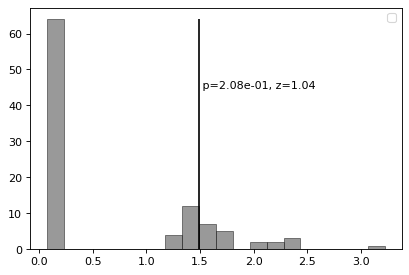

In [222]:
fig, ax = plt.subplots()
PlotPermutationP(Cont_Peak_Q, ASD_Peak_Q, ax)

In [223]:
-np.log10(0.05)

1.3010299956639813

### Peak From Whole, Score From Long

In [142]:
def PeakAllCheckLong(topNs, dat, dat_long, Cont, Cont_long):
    pvalues = []
    for i, topn in enumerate(topNs):
        Z, P = GetPermutationP(Cont[:, i], dat[i])
        pvalues.append(P)
    pvalues = np.array(pvalues)
    dat[pvalues>0.05]=0
    peak_idx = np.argmax(dat)
    peak_size = topNs[peak_idx]
    
    peak_value_all = dat[peak_idx]
    peak_value_long = dat_long[peak_idx]
    
    Z_all, P_all = GetPermutationP(Cont[:, peak_idx], peak_value_all)
    Z_long, P_long = GetPermutationP(Cont_long[:, peak_idx], peak_value_long)
    return peak_size, P_all, P_long
def PeakAllCheckLong2(topNs, dat, dat_long, Cont, Cont_long):
    peak_idx = np.argmax(dat)
    peak_size = topNs[peak_idx]
    
    peak_value_all = dat[peak_idx]
    peak_value_long = dat_long[peak_idx]
    
    Z_all, P_all = GetPermutationP(Cont[:, peak_idx], peak_value_all)
    Z_long, P_long = GetPermutationP(Cont_long[:, peak_idx], peak_value_long)
    return peak_size, P_all, P_long

In [143]:
Cutted_topNs = topNs[10:-5]
Cutted_ASD_Distance = ASD_Distance[10:-5]
Cutted_ASD_DistanceLong = ASD_DistanceLong[10:-5]
Cutted_Cont_Distance = Cont_Distance[10:-5]
Cutted_Cont_DistanceLong = Cont_DistanceLong[10:-5]

ASD_Peak_Size, ASD_P_all, ASD_P_long = PeakAllCheckLong(topNs, 
                    ASD_Distance, ASD_DistanceLong, Cont_Distance, Cont_DistanceLong)
print(ASD_Peak_Size, ASD_P_all, ASD_P_long)

46 0.03199680031996799 0.02009799020097991


In [144]:

Cont_Peak_Size = []
Cont_P_all = []
Cont_P_long = []
NC = 10000
for cont_dat, cont_dat_long in zip(Cont_Distance[:NC], Cont_DistanceLong[:NC]):
    ctrl_Peak_Size, ctrl_P_all, ctrl_P_long = PeakAllCheckLong2(topNs, 
                    cont_dat, cont_dat_long, Cont_Distance, Cont_DistanceLong)
    Cont_Peak_Size.append(ctrl_Peak_Size)
    Cont_P_all.append(ctrl_P_all)
    Cont_P_long.append(ctrl_P_long)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: >

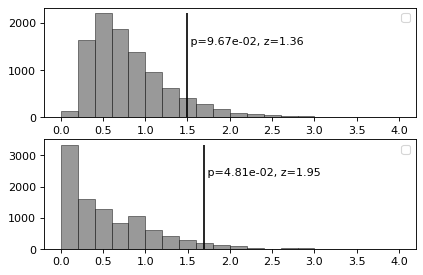

In [145]:
fig, (ax1, ax2) = plt.subplots(2,1)
PlotPermutationP(-np.log10(Cont_P_all), -np.log10(ASD_P_all), ax1)
PlotPermutationP(-np.log10(Cont_P_long), -np.log10(ASD_P_long), ax2)

(array([7555.,  874.,  429.,  207.,  142.,  119.,   90.,   97.,   96.,
         391.]),
 array([  6. ,  25.4,  44.8,  64.2,  83.6, 103. , 122.4, 141.8, 161.2,
        180.6, 200. ]),
 <BarContainer object of 10 artists>)

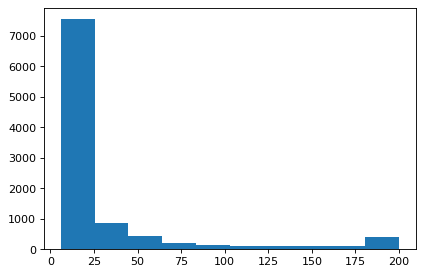

In [146]:
plt.hist(Cont_Peak_Size)

In [176]:
start, end = 79, 4
Cutted_topNs = topNs[start:-end]
print(min(Cutted_topNs), max(Cutted_topNs))
Cutted_ASD_Distance = ASD_Distance[start:-end]
Cutted_ASD_DistanceLong = ASD_DistanceLong[start:-end]
Cutted_Cont_Distance = Cont_Distance[:, start:-end]
Cutted_Cont_DistanceLong = Cont_DistanceLong[:, start:-end]

ASD_Peak_Size, ASD_P_all, ASD_P_long = PeakAllCheckLong(Cutted_topNs, 
                    Cutted_ASD_Distance, Cutted_ASD_DistanceLong, Cutted_Cont_Distance, Cutted_Cont_DistanceLong)
print(ASD_Peak_Size, ASD_P_all, ASD_P_long)

10 121
46 0.03199680031996799 0.02009799020097991


In [177]:
idx = 75
print(Cutted_topNs[idx])
print(Cutted_ASD_Distance[idx])
print(np.mean(Cutted_Cont_Distance[idx,:]))
print(Cutted_ASD_Distance[idx] - np.mean(Cutted_Cont_Distance[idx,:]))

46
0.504659027153166
0.3784717085322868
0.12618731862087923


In [178]:
print(Cutted_topNs[idx])
print(Cutted_ASD_DistanceLong[idx])
print(np.mean(Cutted_Cont_DistanceLong[idx,:]))
print(Cutted_ASD_DistanceLong[idx] - np.mean(Cutted_Cont_DistanceLong[idx,:]))

46
0.3689914128347339
0.21525755928665496
0.15373385354807895


In [179]:
Cont_Peak_Size = []
Cont_P_all = []
Cont_P_long = []
NC = 10000
xx_sizes = []
for cont_dat, cont_dat_long in zip(Cutted_Cont_Distance[:NC], Cutted_Cont_DistanceLong[:NC]):
    ctrl_Peak_Size, ctrl_P_all, ctrl_P_long = PeakAllCheckLong2(Cutted_topNs, 
                    cont_dat, cont_dat_long, Cutted_Cont_Distance, Cutted_Cont_DistanceLong)
    Cont_Peak_Size.append(ctrl_Peak_Size)
    Cont_P_all.append(ctrl_P_all)
    Cont_P_long.append(ctrl_P_long)
    if ctrl_P_long < 0.02:
        xx_sizes.append(ctrl_Peak_Size)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'start 10 - end 121')

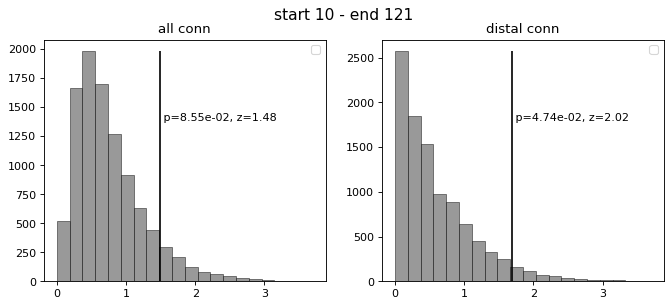

In [180]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
PlotPermutationP(-np.log10(Cont_P_all), -np.log10(ASD_P_all), ax1, title="all conn")
PlotPermutationP(-np.log10(Cont_P_long), -np.log10(ASD_P_long), ax2, title="distal conn")
fig.suptitle("start %d - end %d"%(min(Cutted_topNs), max(Cutted_topNs)), fontsize=14)

In [152]:
print()
print(np.mean(Cont_P_long))
print(np.std(Cont_P_long))


0.4166465513011916
0.30738368636470187


(array([3698.,  873.,  623.,  495.,  587.,  309.,  242.,  228.,  187.,
         214.,  152.,  131.,  129.,  139.,   88.,   81.,   76.,   82.,
         105.,   63.,   57.,   56.,   83.,   43.,   50.,   39.,   43.,
          53.,   30.,   36.,   39.,   45.,   29.,   35.,   36.,   25.,
          45.,   31.,   33.,   29.,   58.,   46.,   36.,   31.,   30.,
          58.,   52.,   65.,   81.,  204.]),
 array([ 10.  ,  12.22,  14.44,  16.66,  18.88,  21.1 ,  23.32,  25.54,
         27.76,  29.98,  32.2 ,  34.42,  36.64,  38.86,  41.08,  43.3 ,
         45.52,  47.74,  49.96,  52.18,  54.4 ,  56.62,  58.84,  61.06,
         63.28,  65.5 ,  67.72,  69.94,  72.16,  74.38,  76.6 ,  78.82,
         81.04,  83.26,  85.48,  87.7 ,  89.92,  92.14,  94.36,  96.58,
         98.8 , 101.02, 103.24, 105.46, 107.68, 109.9 , 112.12, 114.34,
        116.56, 118.78, 121.  ]),
 <BarContainer object of 50 artists>)

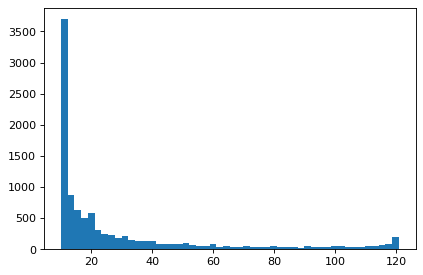

In [156]:
plt.hist(Cont_Peak_Size, bins=50) #xx_sizes

(array([171.,  57.,  35.,  42.,  19.,  20.,  14.,  13.,   9.,  11.,   7.,
         14.,   8.,   3.,   5.,   6.,   3.,   1.,   6.,   6.,   1.,   2.,
          3.,   1.,   4.,   2.,   1.,   1.,   1.,   0.,   0.,   2.,   0.,
          1.,   1.,   0.,   1.,   1.,   0.,   1.]),
 array([ 10.   ,  12.775,  15.55 ,  18.325,  21.1  ,  23.875,  26.65 ,
         29.425,  32.2  ,  34.975,  37.75 ,  40.525,  43.3  ,  46.075,
         48.85 ,  51.625,  54.4  ,  57.175,  59.95 ,  62.725,  65.5  ,
         68.275,  71.05 ,  73.825,  76.6  ,  79.375,  82.15 ,  84.925,
         87.7  ,  90.475,  93.25 ,  96.025,  98.8  , 101.575, 104.35 ,
        107.125, 109.9  , 112.675, 115.45 , 118.225, 121.   ]),
 <BarContainer object of 40 artists>)

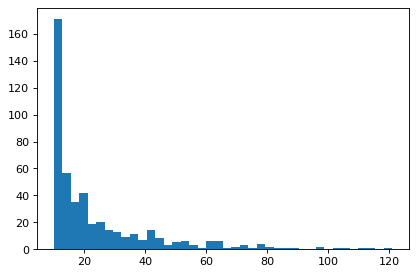

In [162]:
plt.hist(xx_sizes, bins=40) #xx_sizes

### Test Small size distribution

In [137]:
idx = 190
print(topNs[idx])
Mean_at_Idx = np.mean(Cont_Distance[idx,:])
Std_at_Idx = np.std(Cont_Distance[idx,:])
print(Mean_at_Idx, Std_at_Idx)

10
0.35053415511511316 0.07443562946534094


In [133]:
idx = 50
print(topNs[idx])
Mean_at_Idx = np.mean(Cont_Distance[idx,:])
Std_at_Idx = np.std(Cont_Distance[idx,:])
print(Mean_at_Idx, Std_at_Idx)

150
0.27677446534702144 0.03435256696920198


In [196]:
Cont_Distance.shape

(10000, 195)

In [186]:
def QvalueConverting(dist):
    pvalues = np.array([GetPermutationP(dist, x)[1] for x in dist])
    qvalues = -np.log10(pvalues)
    return qvalues

size_10_qs = QvalueConverting(Cont_Distance[:,190])
size_50_qs = QvalueConverting(Cont_Distance[:,150])
size_150_qs = QvalueConverting(Cont_Distance[:, 50])

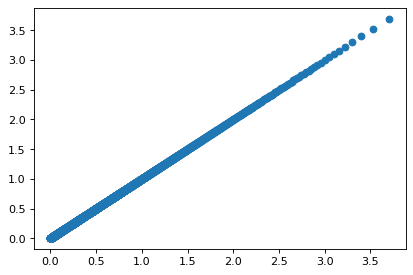

In [197]:
plt.scatter(sorted(size_10_qs), sorted(size_150_qs))

[]

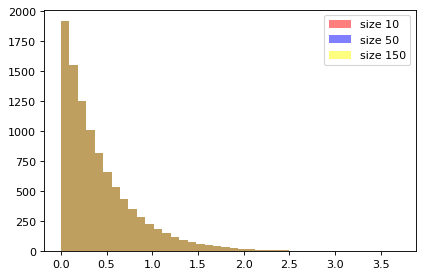

In [189]:
n, bins, patches = plt.hist(size_10_qs, alpha=0.5, color="red", bins=40, label="size 10")
plt.hist(size_50_qs, alpha=0.5, color="blue", bins=bins, label="size 50")
plt.hist(size_150_qs, alpha=0.5, color="yellow", bins=bins, label="size 150")
plt.legend()
plt.plot()

In [173]:
def QvalueConverting(dist):
    pvalues = np.array([GetPermutationP(dist, x)[1] for x in dist])
    qvalues = -np.log10(pvalues)
    return qvalues

In [ ]:
size_10_qs = ZscoreConverting(Cont_DistanceLong[190,:])
size_50_qs = ZscoreConverting(Cont_DistanceLong[150,:])
size_150_qs = ZscoreConverting(Cont_DistanceLong[50,:])

In [193]:
math.comb(200,10)

22451004309013280

In [191]:
math.comb(200,100)

90548514656103281165404177077484163874504589675413336841320

### Try avg Z cross sizes

In [166]:
mean_z_asd = 0
Pvalues = np.array([GetPermutationP(Cont_Distance[:, i], ASD_Distance[i])[1] for i in range(
        ASD_Distance.shape[0])])
Qvalues = -np.log10(Pvalues)
mean_q_asd = np.mean(Qvalues)
print(mean_q_asd)

1.6137567861287636


In [170]:
SubSib_mean_qs = []
for j in range(1000):
    Pvalues = np.array([GetPermutationP(Cont_Distance[:, i], Cont_Distance[j,i])[1] for i in range(
        Cont_Distance[j].shape[0])])
    Qvalues = -np.log10(Pvalues)
    mean_q = np.mean(Qvalues)
    SubSib_mean_qs.append(mean_q)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


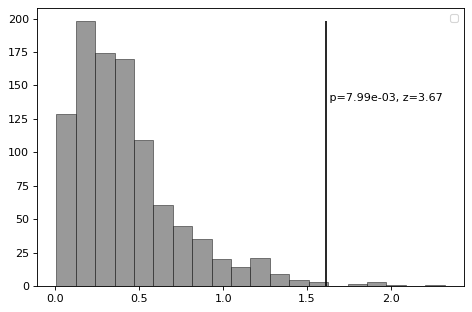

In [171]:
fig, ax = plt.subplots()
PlotPermutationP(SubSib_mean_qs, mean_q_asd, ax)
plt.tight_layout()

In [172]:
mean_z_asd = 0
Pvalues = np.array([GetPermutationP(Cont_DistanceShort[:, i], profile[i])[1] for i in range(
        profile.shape[0])])
Qvalues = -np.log10(Pvalues)

NameError: name 'profile' is not defined

##### (Diff Long JW/JC)

In [231]:
InfoMat_JC = pd.read_csv("../test/ipsi-long-for_jw.csv", index_col=0)

In [232]:
InfoMat_JC

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
Anterior_amygdalar_area,0.000000,0.043127,0.043127,NaN,0.103922,NaN,0.103922,NaN,NaN,0.036903,...,0.036903,0.036903,0.036903,NaN,NaN,NaN,NaN,0.133102,3.846848,0.019296
Anterior_cingulate_area_dorsal_part,0.043127,0.000000,NaN,0.083930,NaN,0.075043,0.103922,0.043127,0.083930,0.019296,...,5.197676,0.036903,0.039857,0.083930,0.039857,0.083930,0.083930,0.083930,5.085547,0.019296
Anterior_cingulate_area_ventral_part,0.043127,NaN,0.000000,0.083930,NaN,0.075043,0.083930,0.043127,0.083930,0.019296,...,0.043127,0.039857,0.043127,0.103922,0.043127,0.103922,0.133102,0.103922,0.075043,0.019296
Nucleus_accumbens,NaN,0.083930,0.083930,0.000000,0.133102,NaN,NaN,0.103922,NaN,0.019296,...,0.019296,0.019296,0.019296,0.133102,0.133102,0.103922,0.103922,0.103922,4.302265,0.019296
Anterodorsal_nucleus,0.103922,NaN,NaN,0.133102,0.000000,0.133102,0.103922,0.083930,0.103922,0.019296,...,0.075043,0.043127,0.075043,NaN,0.103922,NaN,NaN,NaN,0.133102,0.019296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ventral_posterolateral_nucleus_of_the_thalamus,NaN,0.083930,0.103922,0.103922,NaN,NaN,0.083930,NaN,0.103922,0.036903,...,0.083930,0.083930,0.075043,NaN,0.133102,0.000000,NaN,NaN,NaN,0.036903
Ventral_posteromedial_nucleus_of_the_thalamus,NaN,0.083930,0.133102,0.103922,NaN,NaN,0.083930,0.133102,0.083930,0.039857,...,0.083930,0.083930,0.083930,NaN,0.133102,NaN,0.000000,NaN,NaN,0.036903
Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,0.133102,0.083930,0.103922,0.103922,NaN,NaN,0.075043,0.083930,0.075043,0.039857,...,0.075043,0.075043,0.075043,NaN,NaN,NaN,NaN,0.000000,NaN,0.039857
Ventral_tegmental_area,3.846848,0.043127,0.075043,0.075043,3.504205,NaN,0.039857,0.075043,0.043127,0.075043,...,0.043127,0.043127,0.043127,NaN,NaN,NaN,NaN,NaN,0.000000,0.075043


In [263]:
InfoMat_Long

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
Anterior_amygdalar_area,0.000000,0.042915,0.042915,0.000000,0.104178,0.000000,0.104178,0.000000,0.000000,0.036705,...,0.036705,0.036705,0.036705,0.000000,0.000000,0.000000,0.000000,0.132774,3.843424,0.019847
Anterior_cingulate_area_dorsal_part,0.042915,0.000000,0.000000,0.084821,0.000000,0.075743,0.104178,0.042915,0.084821,0.019847,...,5.193009,0.036705,0.039988,0.084821,0.039988,0.084821,0.084821,0.084821,5.092558,0.019847
Anterior_cingulate_area_ventral_part,0.042915,0.000000,0.000000,0.084821,0.000000,0.075743,0.084821,0.042915,0.084821,0.019847,...,0.042915,0.039988,0.042915,0.104178,0.042915,0.104178,0.132774,0.104178,0.075743,0.019847
Nucleus_accumbens,0.000000,0.084821,0.084821,0.000000,0.132774,0.000000,0.000000,0.104178,0.000000,0.019847,...,0.019847,0.019847,0.019847,0.132774,0.132774,0.104178,0.104178,0.104178,4.289224,0.019847
Anterodorsal_nucleus,0.104178,0.000000,0.000000,0.132774,0.000000,0.132774,0.104178,0.084821,0.104178,0.019847,...,0.075743,0.042915,0.075743,0.000000,0.104178,0.000000,0.000000,0.000000,0.132774,0.019847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ventral_posterolateral_nucleus_of_the_thalamus,0.000000,0.084821,0.104178,0.104178,0.000000,0.000000,0.084821,0.000000,0.104178,0.036705,...,0.084821,0.075743,0.075743,0.000000,0.132774,0.000000,0.000000,0.000000,0.000000,0.036705
Ventral_posteromedial_nucleus_of_the_thalamus,0.000000,0.084821,0.132774,0.104178,0.000000,0.000000,0.084821,0.132774,0.084821,0.039988,...,0.084821,0.084821,0.084821,0.000000,0.132774,0.000000,0.000000,0.000000,0.000000,0.036705
Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,0.132774,0.084821,0.104178,0.104178,0.000000,0.000000,0.075743,0.084821,0.075743,0.039988,...,0.075743,0.075743,0.075743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039988
Ventral_tegmental_area,3.843424,0.042915,0.075743,0.075743,3.507596,0.000000,0.039988,0.075743,0.042915,0.075743,...,0.042915,0.042915,0.042915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.075743
